In [2]:
import pandas as pd
import numpy as np
import re
import collections
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [3]:
df = pd.read_csv('NYT_df.csv')

In [6]:
df['Article'] = df['Article'].apply(lambda x:str(x))

In [7]:
df_ne = df.drop(df[df.Article =='nan'].index)

In [10]:
df_ne['polarity'] = df_ne['Article'].apply(lambda x: TextBlob(x).sentiment[0])
df_ne['subjectivity'] = df_ne['Article'].apply(lambda x: TextBlob(x).sentiment[1])

In [11]:
df_ne['Article'] = df_ne['Article'].apply(lambda x: re.sub('((\\n)|(/\\n)+)', ' ', x)).apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))

In [12]:
df_ne.drop('Unnamed: 0', axis=1, inplace=True)

In [110]:
vectorizer_tf = TfidfVectorizer(max_df = .85, max_features = X.shape[0] )
X_tf = vectorizer_tf.fit_transform(df_ne.Article).toarray()

In [17]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_ne.Article) 

In [68]:
type(X)
X.shape

(594, 19131)

In [33]:
pca = PCA(n_components=(X.shape[1]))
pca_x = pca.fit_transform(X.toarray())

In [24]:
pca_x.shape

(594, 594)

In [35]:
pca_t = PCA(n_components=(X_tf.shape[1]))
pca_xtf = pca.fit_transform(X_tf)

In [ ]:
cluster_tf = KMeans(n_clusters)

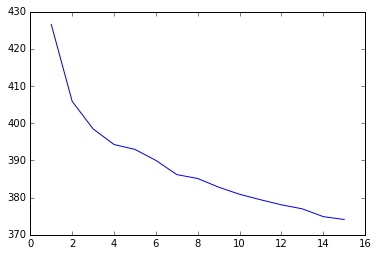

In [31]:
n_tfinertia = []
for i in range(1,16):
    km = KMeans(n_clusters = i, init = 'k-means++', n_init=25)
    kmeans_pca_array = km.fit_transform(X_tf)
    tf_clusters_array = km.predict(X_tf)
    inertia = km.inertia_
    n_tfinertia.append(inertia)
    
#plt.plot(range(1,16),n_tfinertia)

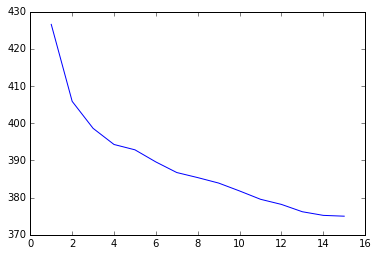

In [36]:
n_tfinertia = []
for i in range(1,16):
    km = KMeans(n_clusters = i, init = 'k-means++', n_init=25)
    kmeans_pca_array = km.fit_transform(pca_xtf)
    tf_clusters_array = km.predict(pca_xtf)
    inertia = km.inertia_
    n_tfinertia.append(inertia)
    
plt.plot(range(1,16),n_tfinertia)

In [27]:
n_inertia = []
for i in range(1,16):
    km = KMeans(n_clusters = i, init = 'k-means++', n_init=25)
    kmeans_pca_array = km.fit_transform(pca_x)
    pca_clusters_array = km.predict(pca_x)
    inertia = km.inertia_
    n_inertia.append(inertia)

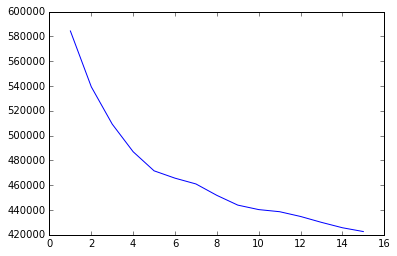

In [28]:
plt.plot(range(1,16),n_inertia)

In [39]:
km_cluster1 = KMeans(n_clusters=4, init='k-means++', n_init=25)
kmeans_pca_array = km_cluster1.fit_transform(pca_x)
pca_clusters_array = km_cluster1.predict(pca_x)
df_ne['pca_cluster'] = pca_clusters_array

In [103]:
df_ne['pca_cluster'].value_counts()

3    310
1    157
2    126
0      1
Name: pca_cluster, dtype: int64

In [111]:
km_cluster1 = KMeans(n_clusters=6, init='k-means++', n_init=25)
kmeans_tfpca_array = km_cluster1.fit_transform(X_tf)
tfpca_clusters_array = km_cluster1.predict(X_tf)
df_ne['tfpca_cluster'] = tfpca_clusters_array

In [112]:
df_ne.head(2)

,Article,Healine,Pub_date,Snippet,URL,polarity,subjectivity,tfpca_cluster,pca_cluster
0,You don t dare use a four letter word around ...,"Herald Price Fahringer, a Defender of Free Spe...",2015-02-20,"The court victories of Mr. Fahringer, a lawyer...",http://www.nytimes.com/2015/02/19/nyregion/her...,0.110565,0.426802,2,1
1,Photo They say the news media likes to dwell o...,Five Economic Trends to Be Thankful For,2014-11-28,"Cheap gas, job growth, worker confidence, home...",http://www.nytimes.com/2014/11/28/upshot/five-...,0.074505,0.439308,3,1


In [75]:
#df_ne.head(2)

In [344]:
#plt.hist(df_ne['polarity'])

In [343]:
#plt.hist(df_ne['subjectivity'])

In [342]:
#sorted(np.array(df_ne['Pub_date']))

In [119]:
def cluster_words(cluster_num, array):
    tmp = ''
    stop = stopwords.words('english')
    stop.extend(('said', 'also'))
    for i in df_ne[array == cluster_num]['Article']:
        tmp = tmp + ' '  + i.lower()
    words = nltk.word_tokenize(tmp)
    stopwordsfree = [stemmer.stem(word) for word in words if word not in stop]
    return pd.Series(stopwordsfree).value_counts()

In [120]:
cluster_words(0, df_ne['tfpca_cluster'])[:20]

oil        647
compani    637
price      368
ga         308
year       308
billion    287
percent    244
energi     212
mr         198
would      182
shell      173
million    159
invest     152
continu    145
new        141
drill      134
share      132
product    131
deal       129
fund       125
dtype: int64

In [121]:
cluster_words(1, df_ne['tfpca_cluster'])[:20]

oil        1137
price       857
product     453
barrel      385
year        371
saudi       322
market      321
energi      262
state       256
opec        243
unit        241
produc      239
day         235
crude       228
percent     203
countri     202
continu     193
global      191
million     190
arabia      188
dtype: int64

In [122]:
cluster_words(2, df_ne['tfpca_cluster'])[:20]

mr          719
oil         693
year        536
price       458
compani     395
state       379
one         356
would       343
continu     336
new         323
main        306
like        299
stori       296
read        284
advertis    277
time        252
million     249
market      229
govern      217
use         212
dtype: int64

In [123]:
cluster_words(3, df_ne['tfpca_cluster'])[:20]

price      550
percent    549
oil        374
year       331
market     273
rate       237
bank       219
month      210
last       185
economi    172
continu    165
report     163
inflat     157
growth     150
expect     148
state      141
consum     140
compani    139
increas    136
econom     130
dtype: int64

In [124]:
cluster_words(4, df_ne['tfpca_cluster'])[:20]

percent     2379
stock        906
rose         824
fell         806
oil          773
price        752
year         649
cent         631
compani      547
point        528
market       524
close        508
p            483
dow          475
index        468
investor     391
gain         381
industri     369
crude        361
minut        353
dtype: int64

In [125]:
cluster_words(5, df_ne['tfpca_cluster'])[:20]

oil        182
price      165
ga         155
would      152
tax        129
climat     126
carbon     122
energi     117
fuel        91
chang       86
year        79
compani     72
could       62
state       59
emiss       59
like        59
use         57
world       55
mr          55
increas     53
dtype: int64

In [147]:
#cluster_words(4)[:20]

** ========================================================================================================= **

In [339]:
#cluster_words(0, df_ne['pca_cluster'])[:50]

In [338]:
#cluster_words(1, df_ne['pca_cluster'])[:50]

In [9]:
stemmer = nltk.stem.porter.PorterStemmer()
def word_counter(cluster_num, array):
    stemmer = nltk.stem.porter.PorterStemmer()
    tmp = ''
    stop = stopwords.words('english')
    stop.extend(('said', 'also'))
    for i in df_ne[array == cluster_num]['Article']:
        tmp = tmp + ' '  + i.lower()
    words = nltk.word_tokenize(tmp)
    stopwordsfree = [stemmer.stem(word) for word in words if word not in stop]
    return sorted(collections.Counter(stopwordsfree), key = (lambda x: x[1]))

In [340]:
#sorted(word_counter(0, df_ne['pca_cluster']).items(), key=lambda x: x[1], reverse=True)[:50]

In [341]:
#sorted(word_counter(1, df_ne['pca_cluster']).items(), key=lambda x: x[1], reverse=True)[:50]

range(0, 263)
263


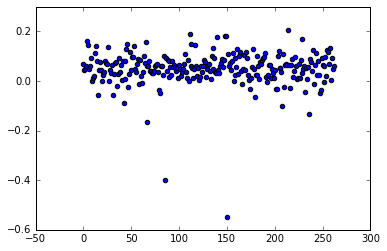

In [105]:
sentiment_df = pd.DataFrame(df_ne.groupby(['Pub_date'])['polarity'].mean())
plt.scatter(range(len(sentiment_df)), sentiment_df['polarity'])
print(range(len(sentiment_df)))
print(len(sentiment_df['polarity']))

In [126]:
cl1 = pd.DataFrame(cluster_words(1, df_ne['tfpca_cluster'])[:20])
cl1.to_csv('cluster1.csv')

In [127]:
cl2 = pd.DataFrame(cluster_words(3, df_ne['tfpca_cluster'])[:20])
cl2.to_csv('cluster2.csv')

In [128]:
cl3 = pd.DataFrame(cluster_words(4, df_ne['tfpca_cluster'])[:20])
cl3.to_csv('cluster3.csv')

In [135]:
cl4 = pd.DataFrame(cluster_words(5, df_ne['tfpca_cluster'])[:17])
cl4.to_csv('cluster4.csv')

** ========================================================================================================= **

In [132]:
cluster_words(1, df_ne['tfpca_cluster'] )[:25]

oil         1137
price        857
product      453
barrel       385
year         371
saudi        322
market       321
energi       262
state        256
opec         243
unit         241
produc       239
day          235
crude        228
percent      203
countri      202
continu      193
global       191
million      190
arabia       188
export       179
cut          177
compani      171
would        169
american     168
dtype: int64

In [134]:
cl4

,0
oil,182
price,165
ga,155
would,152
tax,129
climat,126
carbon,122
energi,117
fuel,91
chang,86
